In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error

In [3]:
from IPython.display import display

from tqdm import tqdm, tqdm_notebook
tqdm.pandas()

import plotly.express as px #Plotly Express

from plotly.offline import iplot

#to link plotly to pandas
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline = False, world_readable = True)

import plotly.io as pio
pio.templates.default = 'plotly_white'

import itertools
import collections
from collections import Counter

from nltk.corpus import stopwords

import re
from wordcloud import WordCloud

plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams['axes.titlesize'] = 16
plt.style.use('seaborn-whitegrid')
sns.set_palette('Set2')

import os

import warnings
warnings.simplefilter('ignore')

from time import time, strftime, gmtime
start = time()
import datetime
print(str(datetime.datetime.now()))

2021-07-10 12:01:49.002304


In [99]:
train=pd.read_csv('C:/Users/DELL/Downloads/actuarialDataScience/train.csv')
test=pd.read_csv('C:/Users/DELL/Downloads/actuarialDataScience/test.csv')
train.head()

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
0,WC8285054,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0,500.00,F,38.0,5,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388
1,WC6982224,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0,509.34,F,37.5,5,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819
2,WC5481426,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0,709.10,F,38.0,5,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087
3,WC9775968,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0,555.46,F,38.0,5,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.487170
4,WC2634037,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,36,M,M,0,0,377.10,F,38.0,5,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925


## EDA

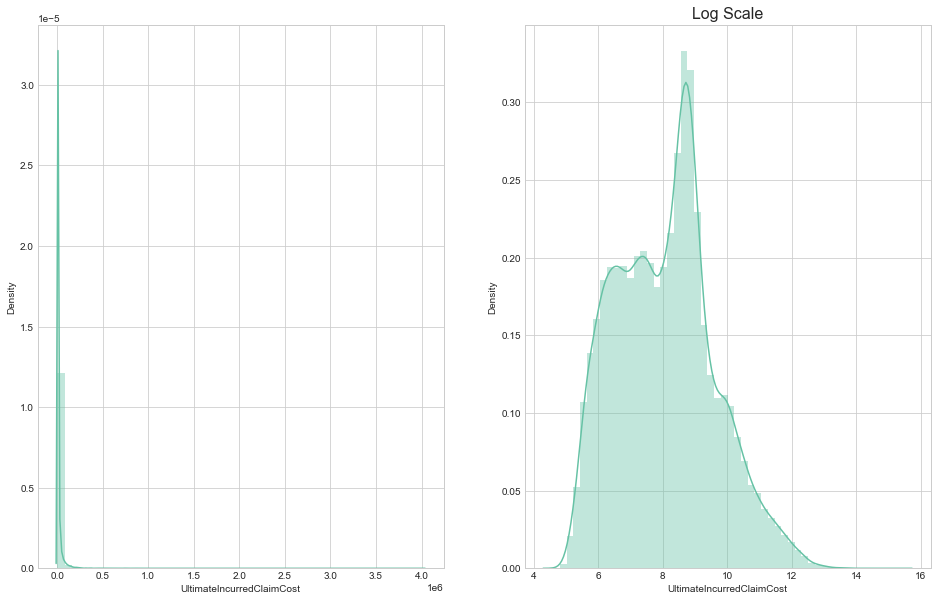

In [100]:
# Ultimate incurred Claim cost

plt.figure(figsize = (16, 10))
plt.subplot(1, 2, 1)
sns.distplot(train['UltimateIncurredClaimCost'])
plt.subplot(1, 2, 2)
plt.title('Log Scale')
sns.distplot(np.log(train['UltimateIncurredClaimCost']));

We see that UltimateIncurredClaimCost followed pareto distribution and so we logged it so that it resembled a little to normal distribution

In [101]:
train.isnull().sum()

ClaimNumber                   0
DateTimeOfAccident            0
DateReported                  0
Age                           0
Gender                        0
MaritalStatus                29
DependentChildren             0
DependentsOther               0
WeeklyWages                   0
PartTimeFullTime              0
HoursWorkedPerWeek            0
DaysWorkedPerWeek             0
ClaimDescription              0
InitialIncurredCalimsCost     0
UltimateIncurredClaimCost     0
dtype: int64

In [102]:
# We see that the null values are only present in marital Status

<AxesSubplot:title={'center':'Test'}, xlabel='MaritalStatus', ylabel='count'>

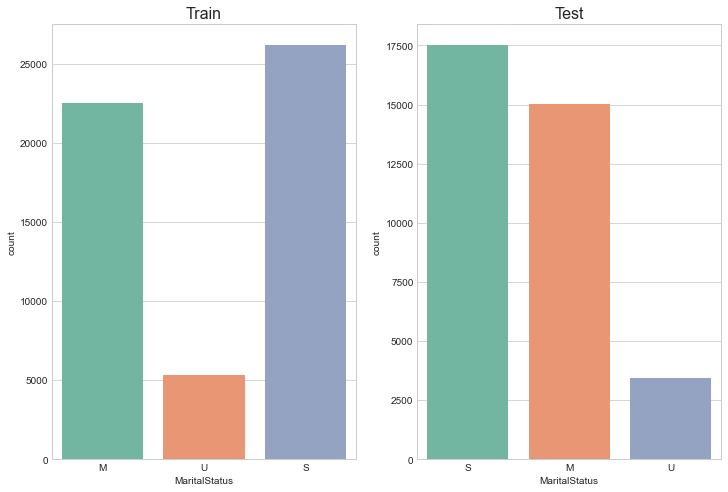

In [103]:
plt.subplot(1,2,1)
plt.title('Train')
sns.countplot(train['MaritalStatus'])

plt.subplot(1,2,2)
plt.title('Test')
sns.countplot(test['MaritalStatus'])

In [104]:
train['MaritalStatus'].fillna('U', inplace = True)
test['MaritalStatus'].fillna('U', inplace = True)

In [105]:
#Changing null with U representing Unknown

In [106]:
train['DateTimeOfAccident']=pd.to_datetime(train['DateTimeOfAccident'])
train['DateReported']=pd.to_datetime(train['DateReported'])

test['DateTimeOfAccident']=pd.to_datetime(test['DateTimeOfAccident'])
test['DateReported']=pd.to_datetime(test['DateReported'])

<AxesSubplot:title={'center':'Test'}, xlabel='Age', ylabel='Density'>

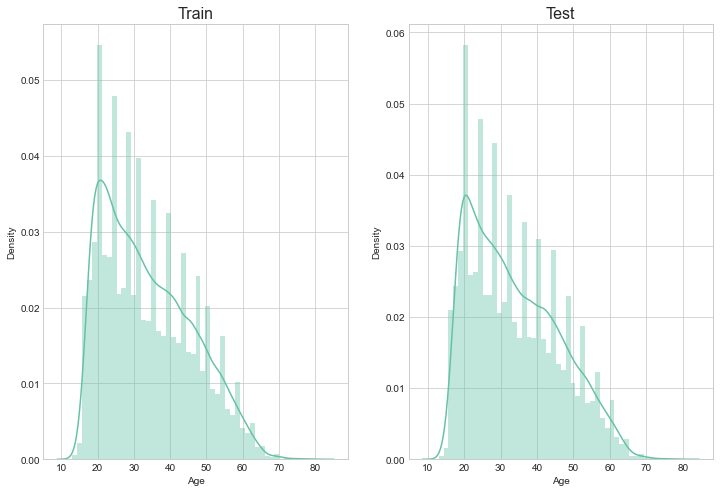

In [107]:
plt.subplot(1,2,1)
plt.title('Train')
sns.distplot(train['Age'])

plt.subplot(1,2,2)
plt.title('Test')
sns.distplot(test['Age'])

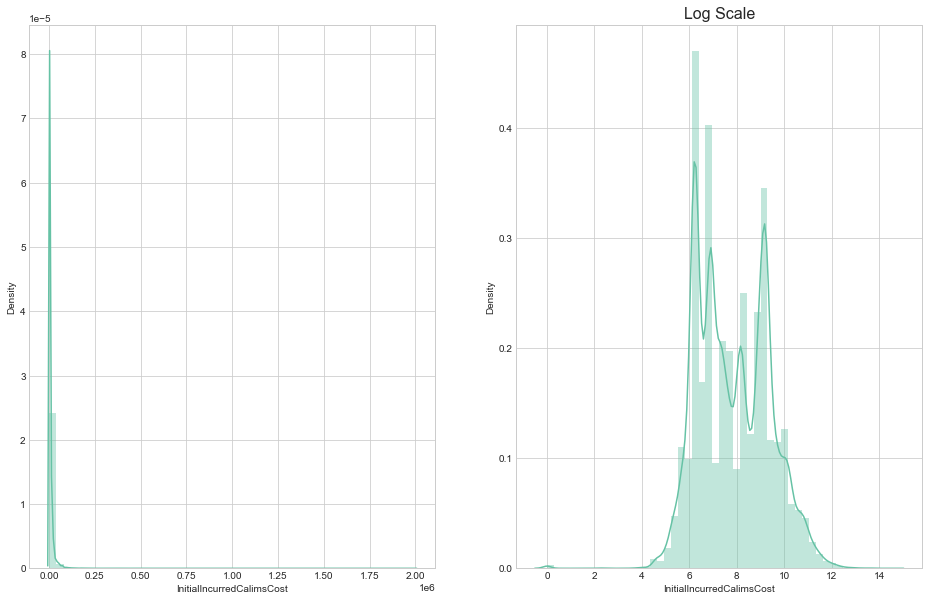

In [108]:
plt.figure(figsize = (16, 10))
plt.subplot(1, 2, 1)
sns.distplot(train['InitialIncurredCalimsCost'])
plt.subplot(1, 2, 2)
plt.title('Log Scale')
sns.distplot(np.log(train['InitialIncurredCalimsCost']));

(0.0, 80.0)

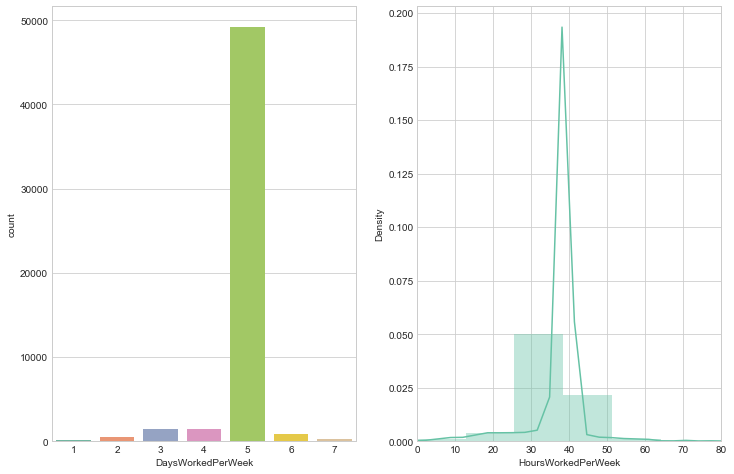

In [109]:
plt.subplot(1,2,1)
sns.countplot(train['DaysWorkedPerWeek'])

plt.subplot(1,2,2)
sns.distplot(train['HoursWorkedPerWeek'])
plt.xlim(0,80)

Therefore we see that most people work about close to 37.5 hours per week which is a 5 day work week .
They are of ages close to 20 ranging from 20 to 40 with majority being single but with a large number of married people.

In [110]:
train['TimeDiff']=(train['DateReported'] - train['DateTimeOfAccident']).astype('timedelta64[h]')
test['TimeDiff']=(test['DateReported'] - test['DateTimeOfAccident']).astype('timedelta64[h]')

In [111]:
train['Acc_Day']=train['DateTimeOfAccident'].dt.dayofweek
test['Acc_Day']=test['DateTimeOfAccident'].dt.dayofweek

train['Acc_Month']=train['DateTimeOfAccident'].dt.month
test['Acc_Month']=test['DateTimeOfAccident'].dt.month

train['Acc_Year']=train['DateTimeOfAccident'].dt.year
test['Acc_Year']=test['DateTimeOfAccident'].dt.year


<AxesSubplot:xlabel='Acc_Day', ylabel='count'>

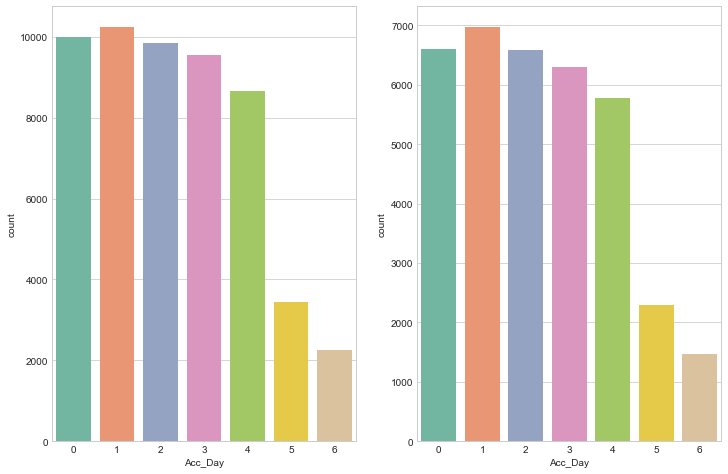

In [112]:
plt.subplot(1,2,1)
sns.countplot(train['Acc_Day'])

plt.subplot(1,2,2)
sns.countplot(test['Acc_Day'])


Therefore we see that the accidents were the lowest on saturday and sunday

<AxesSubplot:xlabel='Acc_Month', ylabel='count'>

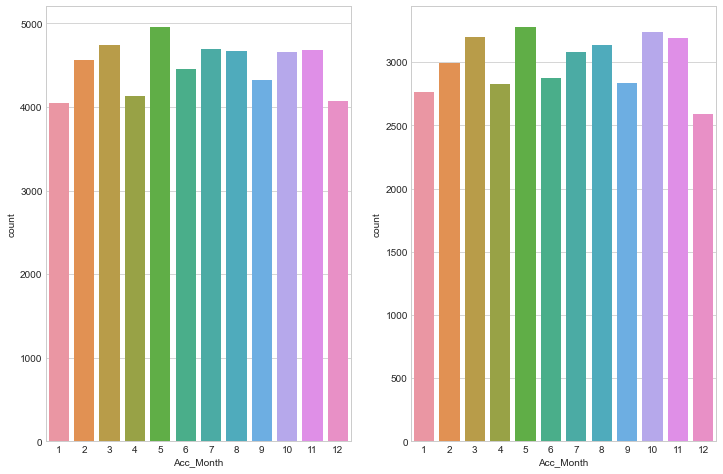

In [113]:
plt.subplot(1,2,1)
sns.countplot(train['Acc_Month'])

plt.subplot(1,2,2)
sns.countplot(test['Acc_Month'])


From both data we see the least accidents on December , January , April, June and September , with December and January being the lowest.

In [114]:
print('Train:')
print(f"Max. Time Diff in Hrs: {train['TimeDiff'].max()}")
print(f"Min. Time Diff in Hrs: {train['TimeDiff'].min()}")
print(f"Avg. Time Diff in Hrs: {round(train['TimeDiff'].mean(), 2)}")

print('Test:')
print(f"Max. Time Diff in Hrs: {test['TimeDiff'].max()}")
print(f"Min. Time Diff in Hrs: {test['TimeDiff'].min()}")
print(f"Avg. Time Diff in Hrs: {round(test['TimeDiff'].mean(), 2)}")

Train:
Max. Time Diff in Hrs: 26268.0
Min. Time Diff in Hrs: -16.0
Avg. Time Diff in Hrs: 931.86
Test:
Max. Time Diff in Hrs: 26125.0
Min. Time Diff in Hrs: -13.0
Avg. Time Diff in Hrs: 918.86


In [115]:
display(train[train['TimeDiff']<0],test[test['TimeDiff']<0])

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost,TimeDiff,Acc_Day,Acc_Month,Acc_Year
1364,WC9881756,2005-07-18 16:00:00+00:00,2005-07-18 00:00:00+00:00,20,M,S,0,0,1800.0,F,56.0,6,MOTOR VEHICLE ACCIDENT BRUISED FACE AND LEFT HAND,10140,9506.429889,-16.0,0,7,2005
16383,WC3162544,1991-06-11 10:00:00+00:00,1991-06-11 00:00:00+00:00,26,F,M,0,0,450.0,F,40.0,5,NORMAL DUTIES LACERATED RIGHT SHIN,500,348.402314,-10.0,1,6,1991
42369,WC6573487,1998-02-21 11:00:00+00:00,1998-02-21 00:00:00+00:00,27,M,S,0,0,200.0,F,38.0,5,STRUCK STEEL CUTTER LACERATED WRISTS LEFT THUMB,500,259.968299,-11.0,5,2,1998
48206,WC7065884,1999-04-05 12:00:00+00:00,1999-04-05 00:00:00+00:00,42,M,U,0,0,80.0,P,20.0,3,HAND SLIPPED STRUCK HAND LACERATED LEFT HAND,500,586.348383,-12.0,0,4,1999
52069,WC7249039,2000-01-21 08:00:00+00:00,2000-01-21 00:00:00+00:00,28,M,M,0,0,200.0,F,38.0,5,PULLING PALLET STRAINED UPPER BACK,10000,5276.452882,-8.0,4,1,2000


,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,TimeDiff,Acc_Day,Acc_Month,Acc_Year
2404,WC2497523,1989-11-13 08:00:00+00:00,1989-11-13 00:00:00+00:00,22,M,S,0,0,703.93,F,38.0,5,HOT SLAG FLEW INTO EYES CONJUNCTIVITIS BOTH EYES,500,-8.0,0,11,1989
6234,WC5012639,1995-05-09 08:00:00+00:00,1995-05-09 00:00:00+00:00,33,M,U,0,0,484.50,F,38.0,5,SCREWDRIVER LACERATED LEFT HAND BRUISING LEFT ...,550,-8.0,1,5,1995
11777,WC7371081,2000-01-04 13:00:00+00:00,2000-01-04 00:00:00+00:00,25,M,S,0,0,200.00,F,38.0,5,STRUCK GLASS LACERATED RIGHT THUMB,500,-13.0,1,1,2000
16716,WC3371198,1991-05-26 13:00:00+00:00,1991-05-26 00:00:00+00:00,47,F,M,0,0,344.50,F,38.0,5,SLIPPED WITH KNIFE CUT LEFT THUMB AMPUTATION O...,1510,-13.0,6,5,1991
34991,WC2139924,1989-10-27 10:00:00+00:00,1989-10-27 00:00:00+00:00,19,F,S,0,0,386.46,F,40.0,5,SPANNER SLIPPED AND CRUSHED LEFT INDEX FINGER,500,-10.0,4,10,1989


In [116]:
train['TimeDiff']=train['TimeDiff'].apply(lambda x: 0 if x<0  else x)
test['TimeDiff']=test['TimeDiff'].apply(lambda x: 0 if x<0  else x)

In [117]:
train.drop(['ClaimNumber','DateTimeOfAccident','DateReported','ClaimDescription'],axis=1,inplace=True)
test.drop(['ClaimNumber','DateTimeOfAccident','DateReported','ClaimDescription'],axis=1,inplace=True)

### Standardization and Label Encoding

In [118]:
train['InitialIncurredCalimsCost'] = np.log(train['InitialIncurredCalimsCost'])
test['InitialIncurredCalimsCost'] = np.log(test['InitialIncurredCalimsCost'])
train['UltimateIncurredClaimCost']=np.log(train['UltimateIncurredClaimCost'])

target = np.log1p(train['UltimateIncurredClaimCost'])

In [119]:
train['Gender']=train['Gender'].apply(lambda x: 1 if x == 'M' else 0)
train['PartTimeFullTime']=train['PartTimeFullTime'].apply(lambda x: 1 if x=="F" else 0)

In [120]:
test['Gender']=test['Gender'].apply(lambda x: 1 if x == 'M' else 0)
test['PartTimeFullTime']=test['PartTimeFullTime'].apply(lambda x: 1 if x=="F" else 0)

<AxesSubplot:xlabel='MaritalStatus', ylabel='Age'>

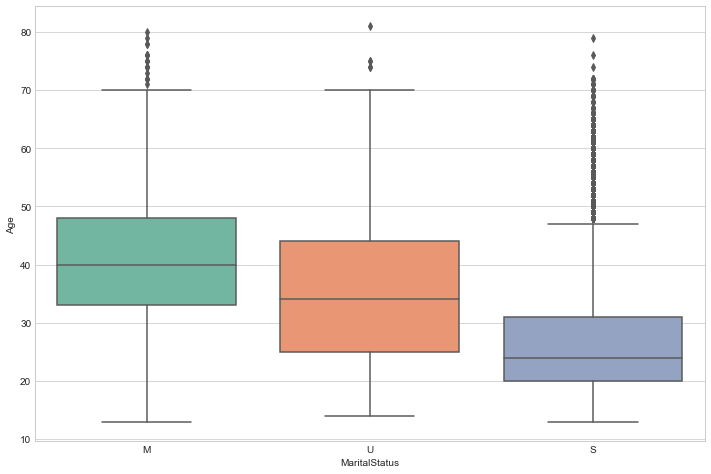

In [121]:
sns.boxplot(x='MaritalStatus',y='Age',data=train)

Therefore we classify all aged above 32 to be married and all aged below 32 to be unmarried in the unknown data.

In [122]:
train['MaritalStatus']=train['MaritalStatus'].map({'M':1,'S':0})
test['MaritalStatus']=test['MaritalStatus'].map({'M':1,'S':0})

In [123]:
def impute_marital(cols):
    mar_status=cols[0]
    age=cols[1]
    
    if pd.isnull(mar_status):
        
        if age<=32:
            return 0
        else:
            return 1
    
    else:
        return(mar_status)

In [124]:
train['MaritalStatus']=train[['MaritalStatus','Age']].apply(impute_marital, axis=1)
test['MaritalStatus']=test[['MaritalStatus','Age']].apply(impute_marital, axis=1)

<AxesSubplot:>

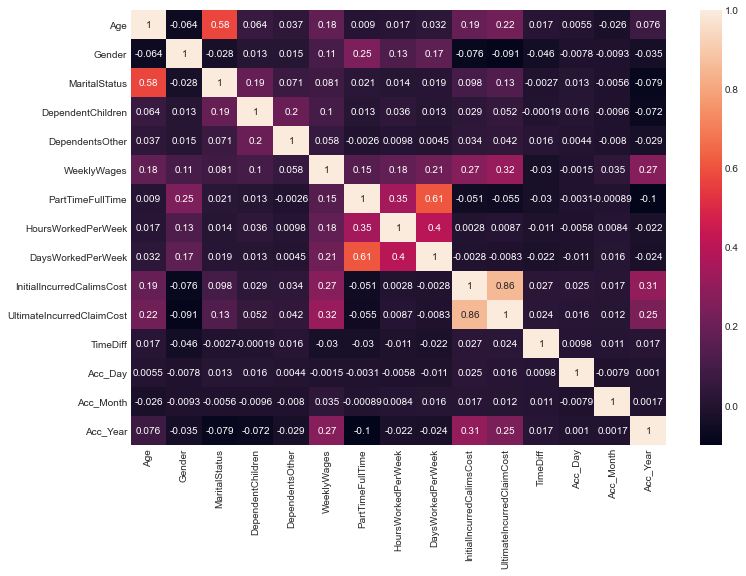

In [125]:
#Correlation Heatmap
sns.heatmap(train.corr(),annot=True)

Since correlation of initial and ultimate claims cost is more than 0.7 we remove the variable

In [126]:
train.drop(['InitialIncurredCalimsCost'],axis=1,inplace=True)
test.drop(['InitialIncurredCalimsCost'],axis=1,inplace=True)

In [127]:
target=train['UltimateIncurredClaimCost']
train.drop(['UltimateIncurredClaimCost'],axis=1,inplace=True)

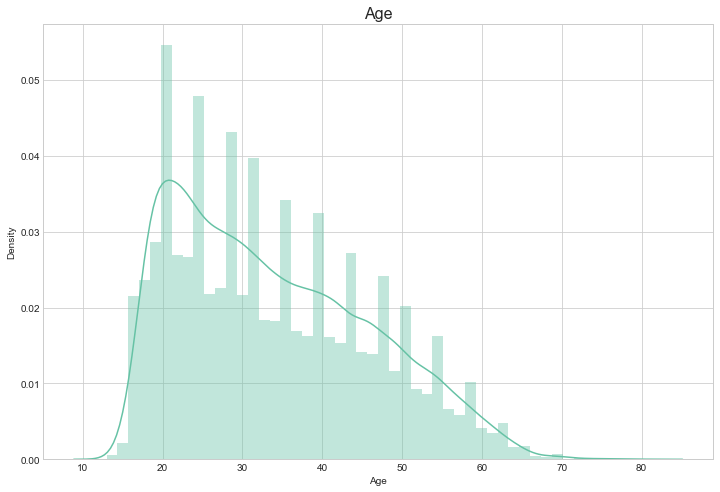

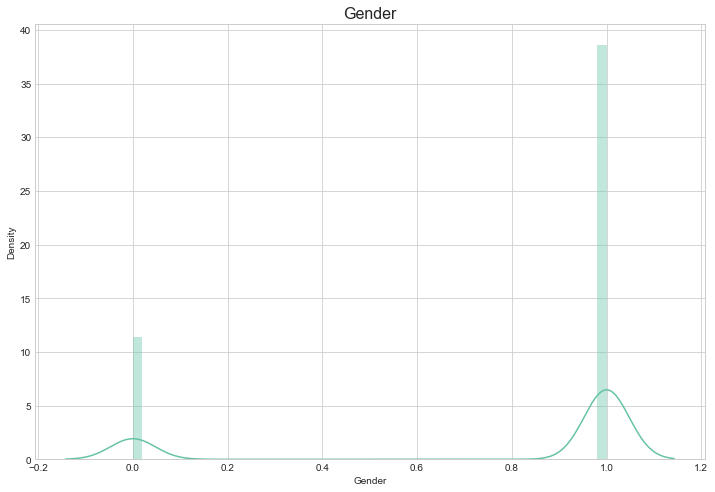

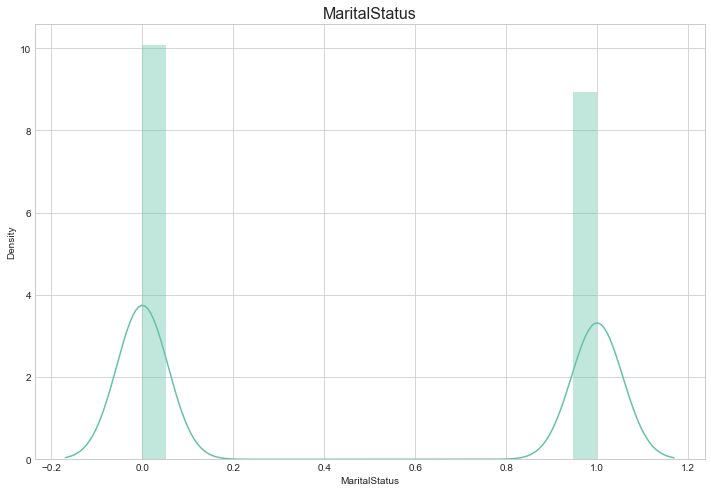

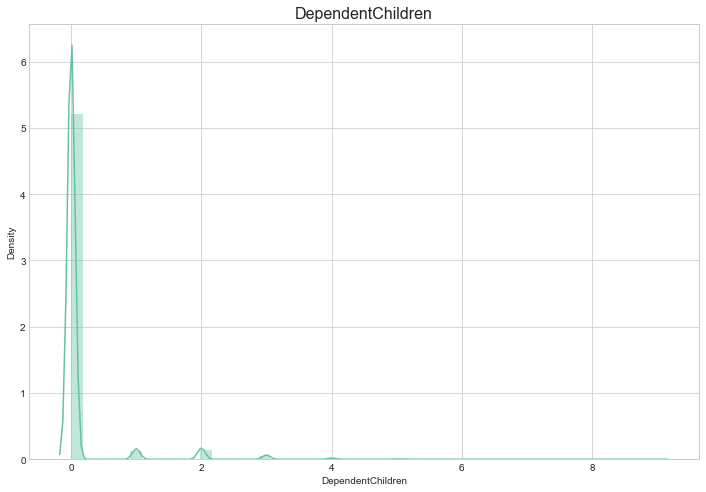

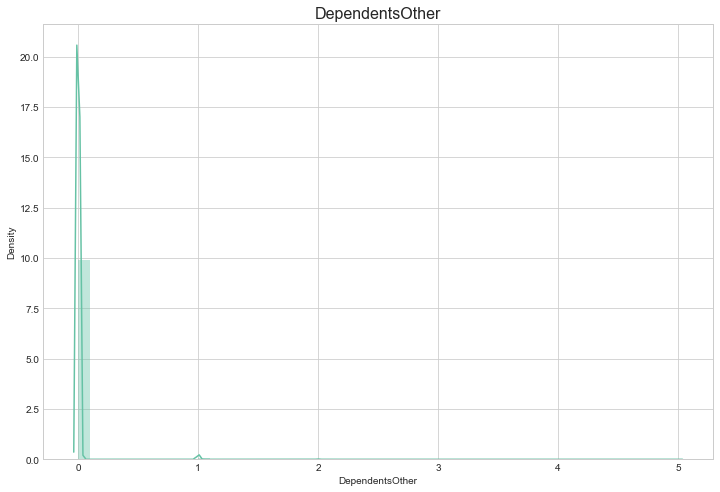

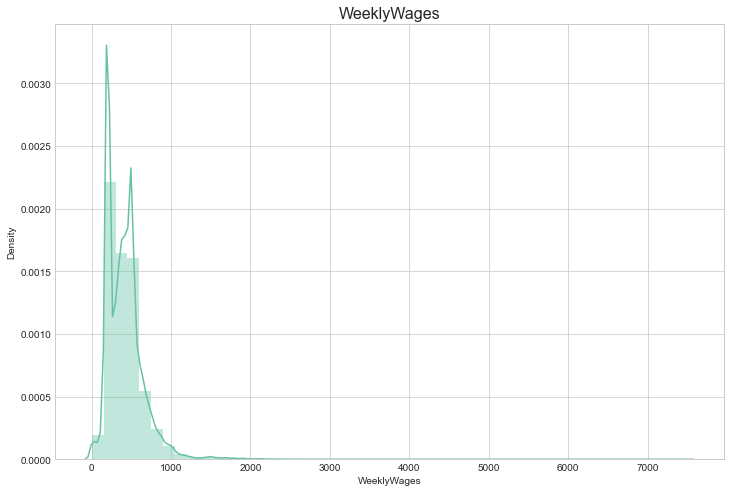

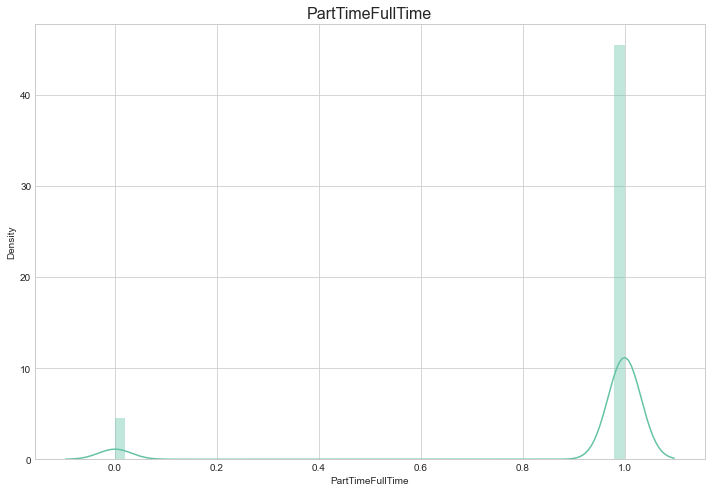

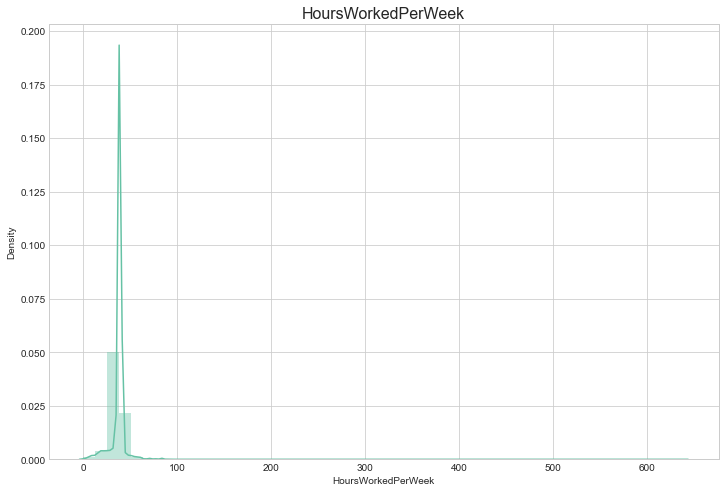

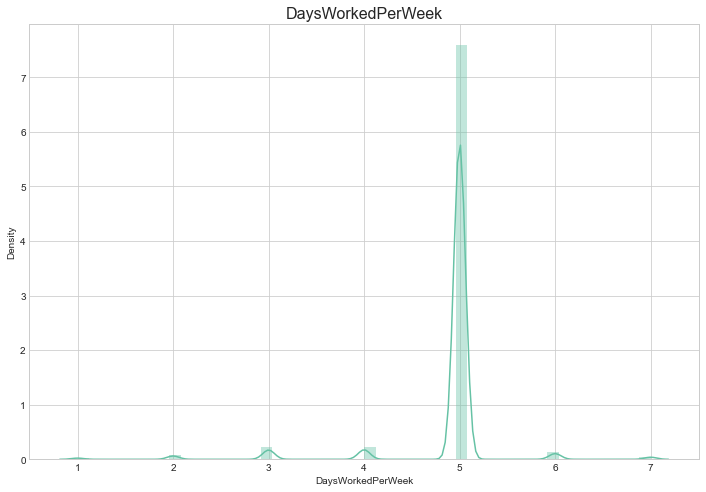

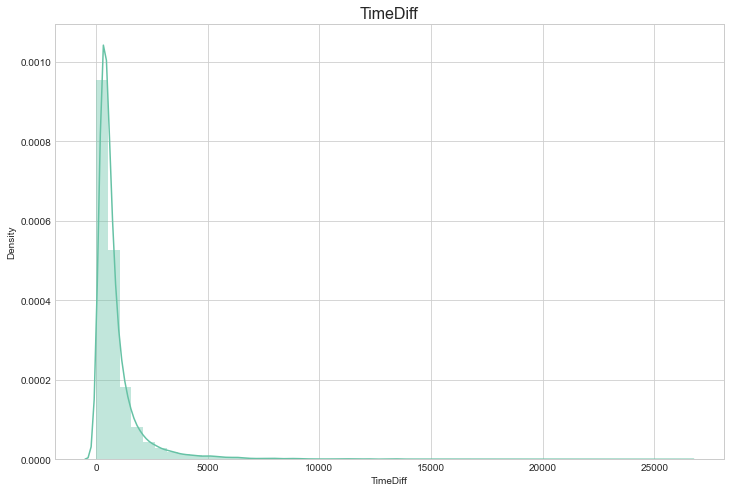

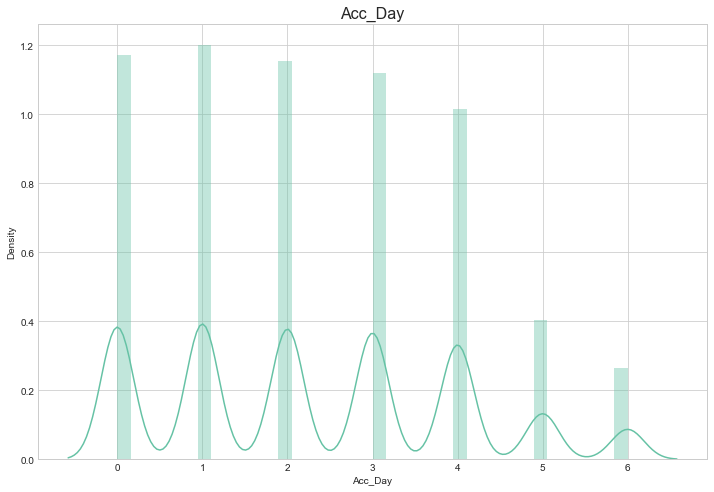

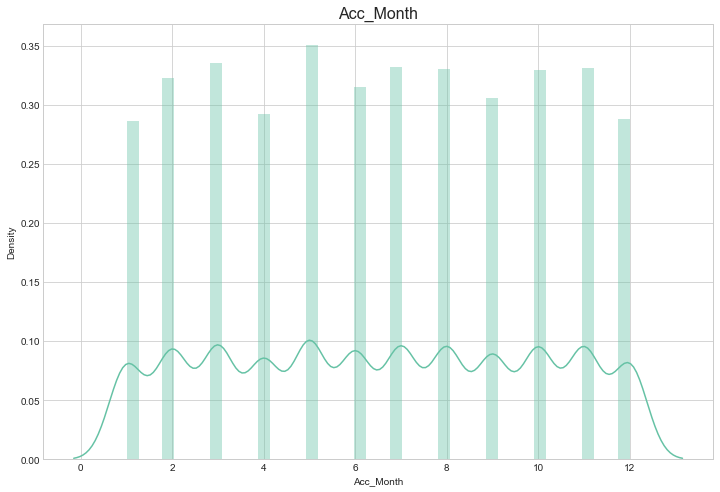

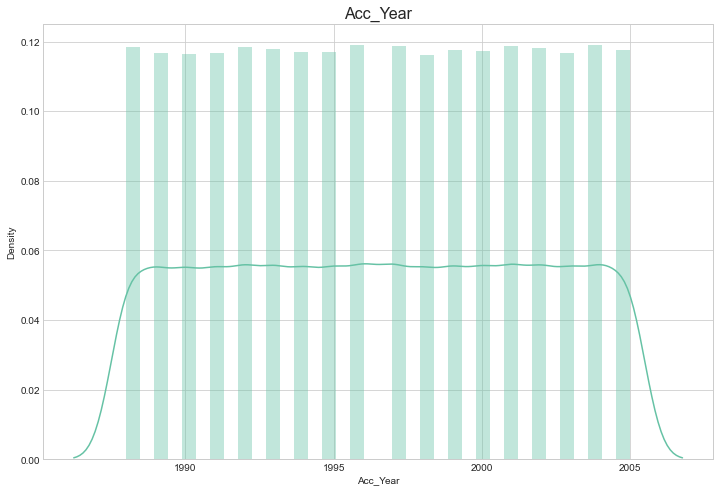

In [128]:
features=[feature for feature in train.columns]

for feature in features:
    data2 = train.copy()
    
    sns.distplot(train[feature])
    plt.title(feature)
    plt.show()

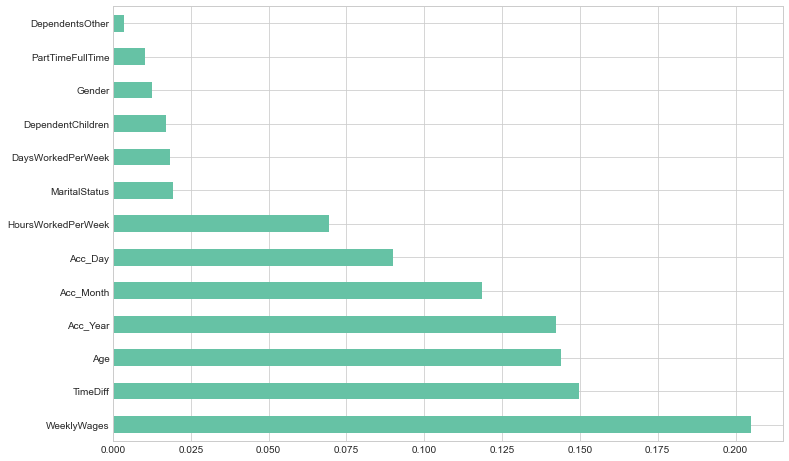

In [129]:
from sklearn.ensemble import ExtraTreesRegressor as etr
selection=etr()
selection.fit(train,target)

plt.figure(figsize=(12,8))
feat_importance = pd.Series(selection.feature_importances_,index=train.columns)
feat_importance.nlargest(15).plot(kind='barh')
plt.show()

This shows the most important features of the data

Scaling the data...

In [133]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
train2=pd.DataFrame(scalar.fit_transform(train))
test2=pd.DataFrame(scalar.fit_transform(test))

In [134]:
#Performing train test splitting
x_train, x_valid,y_train, y_valid = train_test_split(train2,target,random_state=2021, test_size=0.2)

## Testing Different Models

1) Lasso Regression (Hyperparameter Tuning)

In [143]:
from sklearn.linear_model import Lasso as ls 
from sklearn.model_selection import GridSearchCV as gsv

In [144]:
lasso=ls()
parameters={'alpha':[1e-15,1e-10,1e-3,1,5,10,20,30,50,100]}
lasso_regressor=gsv(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(x_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-10}
-1.9325109138749066


Selecting the important features

In [145]:
from sklearn.linear_model import Lasso as ls
from sklearn.feature_selection import SelectFromModel
feature_sel_model = SelectFromModel(ls(alpha=0.005,random_state=101))
feature_sel_model.fit(x_train,y_train)
feature_sel_model.get_support()

array([ True,  True,  True, False, False,  True,  True, False, False,
       False,  True,  True,  True])

Therefore we see that 4,5,8,9,10th features are not important.
These are DependentChildren and others, hours and days worked per week and time difference

In [146]:
y_pred1=lasso_regressor.predict(x_valid)

<AxesSubplot:xlabel='UltimateIncurredClaimCost', ylabel='Density'>

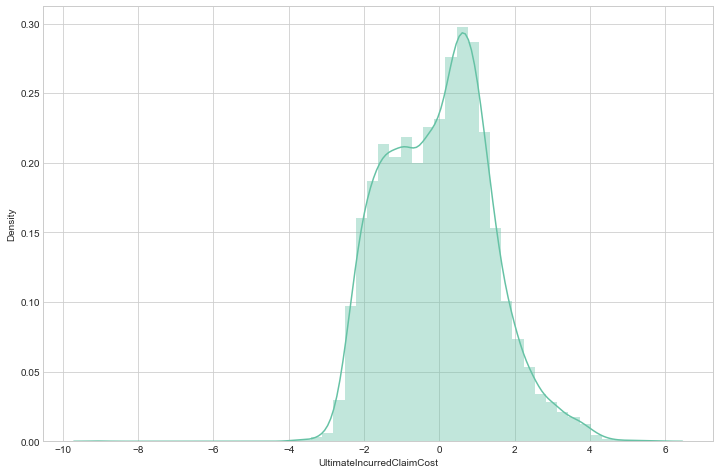

In [147]:
sns.distplot(y_valid-y_pred1)

In [148]:
from sklearn import metrics
metrics.r2_score(y_valid,y_pred1)

0.17137481402586252

In [149]:
mse = metrics.mean_squared_error(y_valid, y_pred1)
rmse = np.sqrt(mse)
print((f"LASSO REGRESSION RMSE: {np.sqrt(mean_squared_error(y_valid, y_pred1))}"))

LASSO REGRESSION RMSE: 1.3857858201976272


2) XGBoost

In [150]:
params={
    "learning_rate":[0.05,0.1,0.15,0.2,0.25,0.3],
    "max_depth":[3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gamma":[0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]
}

In [151]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor as xgb
regressor= xgb()

In [152]:
random_search= RandomizedSearchCV(regressor,param_distributions=params,
                                 n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,
                                  verbose=3
                                 )

In [153]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          reg_lambda=None,
                                          scale_pos_weight=None, subsample=None,
                                          tree_met

In [154]:
random_search.best_params_

{'min_child_weight': 5,
 'max_depth': 8,
 'learning_rate': 0.2,
 'gamma': 0.3,
 'colsample_bytree': 0.3}

In [155]:
xg_vpreds = random_search.predict(x_valid)
print((f"XGBOOST RMSE: {np.sqrt(mean_squared_error(y_valid, xg_vpreds))}"))

XGBOOST RMSE: 1.2922196279794194


3) Light GBM

In [135]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(
               objective = 'regression', 
               num_leaves = 4,
               learning_rate = 0.01, 
               n_estimators = 10000,
               max_bin = 200, 
               bagging_fraction = 0.75,
               bagging_freq = 5, 
               bagging_seed = 7,
               feature_fraction = 0.2,
               feature_fraction_seed = 7,
               verbose = 1,
            )

lgbm_model = lgbm.fit(x_train, y_train)

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002799 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data poi

In [136]:
lg_vpreds = lgbm_model.predict(x_valid)
print((f"LGBM RMSE: {np.sqrt(mean_squared_error(y_valid, lg_vpreds))}"))

LGBM RMSE: 1.2925951247499623


Therefore we see that light Gbm and XGBoost > Lasso regression in terms of prediction

1) Predicting in test data using Light GBM

In [137]:
new_pred=lgbm_model.predict(test2)

In [139]:
sample_sub = pd.read_csv("C:/Users/DELL/Downloads/sample_submission (1).csv")

<AxesSubplot:xlabel='UltimateIncurredClaimCost', ylabel='Density'>

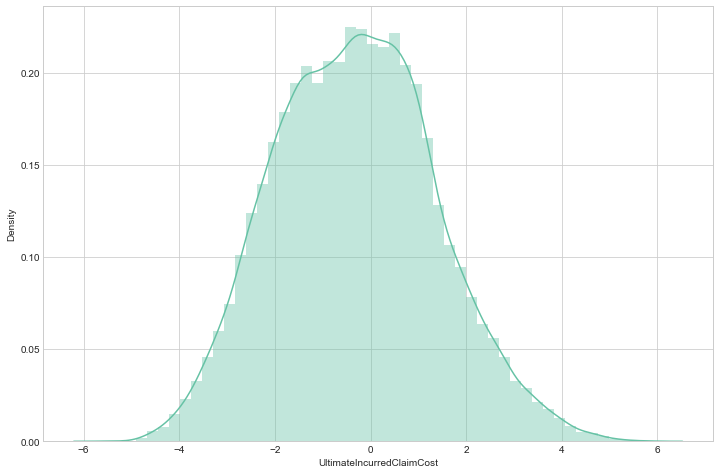

In [142]:
sns.distplot(np.log(sample_sub['UltimateIncurredClaimCost'])-new_pred)

In [156]:
print((f"LGBM RMSE: {np.sqrt(mean_squared_error(np.log(sample_sub['UltimateIncurredClaimCost']), new_pred))}"))

LGBM RMSE: 1.7050613075082137


Predicting using XgBoost

In [157]:
new_pred2 = random_search.predict(test2)

<AxesSubplot:xlabel='UltimateIncurredClaimCost', ylabel='Density'>

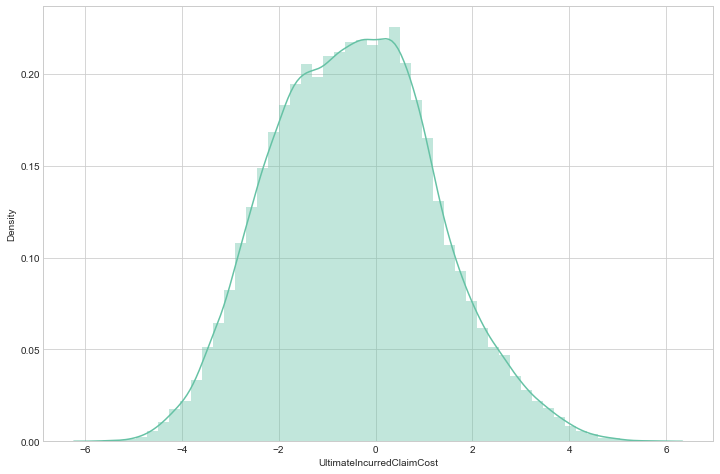

In [158]:
sns.distplot(np.log(sample_sub['UltimateIncurredClaimCost'])-new_pred2)

In [159]:
print((f"XGBM RMSE: {np.sqrt(mean_squared_error(np.log(sample_sub['UltimateIncurredClaimCost']), new_pred2))}"))

XGBM RMSE: 1.7267928168903972


## Therefore we see that both the models seems to be fairly accurate but light GBM seems to be slightly more accurate